#Pasos para crear un modelo VAR con series temporales multivariantes:

1. Análisis exploratorios de los datos.
2. Dividir la serie en conjuntos de entrenamiento y prueba.
3. Prueba de estacionariedad.
4. Transformar la serie de entrenamiento si es necesario. 
5. Construir un modelo VAR sobre las series transformadas.
6. Causalidad de Granger.
7. Diagnóstico del modelo.
8. Realizar pronósticos utilizando el modelo finalmente elegido.
9. Transformación inversa del pronóstico a la escala original.
10. Realizar una evaluación del pronóstico.

# Los datos: Binance
A continuanción se importaran los datos del par de valores BTC/USDT desde el 18/08/2017 al 31/07/2022

#### Importación de las librerías

In [ ]:
import pandas as pd
import numpy as np
import math
%matplotlib inline

#### Cargamos los datos



In [ ]:
# Cargamos los datos
raw_data = pd.read_csv('./BTCUSDT1h-18.8.17-31-7-22.csv', index_col=0, parse_dates=True)
del raw_data['ignore'] #eliminamos la variable ignore tal y como nos indica la libreria de binance
del raw_data['open_time'] #eliminamos la variable open_time
del raw_data['close_time'] #eliminamos la variable close_time
raw_data

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,,
2017-08-18 00:59:59.999,4285.08,4340.62,4228.76,4286.53,82.435474,3.535044e+05,268,70.703594,3.032123e+05
2017-08-18 01:59:59.999,4269.36,4269.36,4134.61,4243.59,75.684883,3.183275e+05,243,45.573568,1.924075e+05
2017-08-18 02:59:59.999,4251.95,4298.64,4234.00,4267.59,54.071337,2.304786e+05,219,46.316836,1.973981e+05
2017-08-18 03:59:59.999,4244.77,4308.70,4234.00,4292.39,64.001349,2.734950e+05,306,52.061572,2.225602e+05
2017-08-18 04:59:59.999,4292.39,4292.39,4234.43,4287.92,50.797515,2.165126e+05,267,45.826187,1.953660e+05
...,...,...,...,...,...,...,...,...,...
2022-07-30 20:59:59.999,23923.74,24078.94,23808.76,23963.03,8368.642780,2.002667e+08,236616,4165.534560,9.968639e+07
2022-07-30 21:59:59.999,23963.03,24005.00,23836.46,23860.51,3719.159970,8.893710e+07,135696,1857.729650,4.442882e+07
2022-07-30 22:59:59.999,23860.51,23863.12,23502.25,23700.98,9444.710130,2.232761e+08,244551,4611.208340,1.089986e+08


In [ ]:
df_comp=raw_data.copy()


## Definición de las variables

In [ ]:
n_obs=math.floor(72)
freq='h'

#### Visualización del Dataset

In [ ]:
df_comp.head()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,,
2017-08-18 00:59:59.999,4285.08,4340.62,4228.76,4286.53,82.435474,353504.410409,268,70.703594,303212.284309
2017-08-18 01:59:59.999,4269.36,4269.36,4134.61,4243.59,75.684883,318327.529415,243,45.573568,192407.488931
2017-08-18 02:59:59.999,4251.95,4298.64,4234.00,4267.59,54.071337,230478.628087,219,46.316836,197398.076557
2017-08-18 03:59:59.999,4244.77,4308.70,4234.00,4292.39,64.001349,273495.006480,306,52.061572,222560.204200
2017-08-18 04:59:59.999,4292.39,4292.39,4234.43,4287.92,50.797515,216512.633035,267,45.826187,195365.989365


#### Comprobar valores NULL

In [ ]:
df_comp.isnull().sum()

open               0
high               0
low                0
close              0
volume             0
qav                0
num_trades         0
taker_base_vol     0
taker_quote_vol    0
dtype: int64

#### Definir la frequencia
Se ha incluido un corrector de valores NULL para evitar problemas en futuros datasets.

In [ ]:
df_comp=df_comp.asfreq(freq)
df_comp=df_comp.fillna(method='ffill')
df_comp.isnull().sum()

open               0
high               0
low                0
close              0
volume             0
qav                0
num_trades         0
taker_base_vol     0
taker_quote_vol    0
dtype: int64

#### Guardar una copia de seguridad de los datos en un CSV

In [ ]:
#Guardar el dataset
#df_comp.to_csv('BTC-USDT-Market.csv')

# Análisis exploratorio

#### Visualización de las diferentes variables

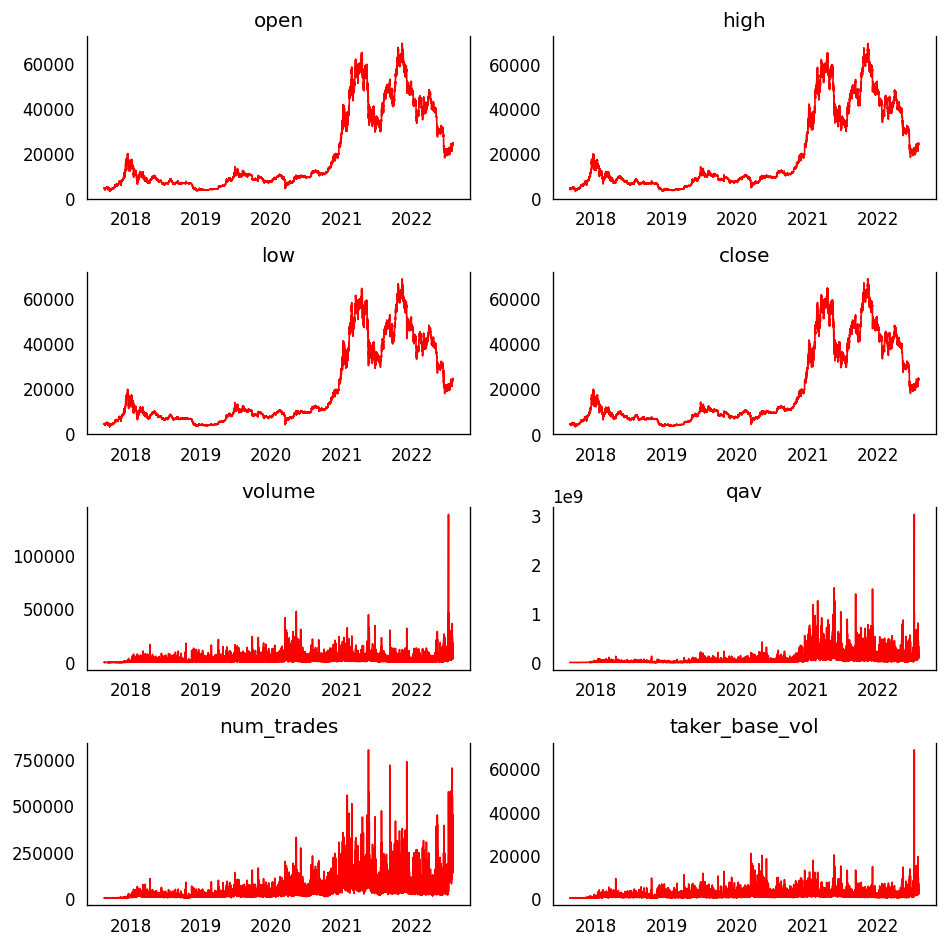

In [ ]:
# Plots
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(8,8))

for i, ax in enumerate(axes.flatten()):
 data = df_comp[df_comp.columns[i]]
 ax.plot(data, color='red', linewidth=1)
 ax.set_title(df_comp.columns[i])
 ax.xaxis.set_ticks_position('none')
 ax.yaxis.set_ticks_position('none')
 ax.spines['top'].set_alpha(0)
 ax.tick_params(labelsize=10)
 plt.tight_layout();

#### Análisis de correlación

In [ ]:
corr=df_comp.corr()
corr

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
open,1.000000,0.999957,0.999936,0.999922,0.144428,0.604487,0.548973,0.137826,0.603474
high,0.999957,1.000000,0.999902,0.999957,0.147485,0.607792,0.551778,0.141232,0.607145
low,0.999936,0.999902,1.000000,0.999949,0.140007,0.599571,0.544877,0.133906,0.599075
close,0.999922,0.999957,0.999949,1.000000,0.144022,0.604055,0.548659,0.138070,0.603716
volume,0.144428,0.147485,0.140007,0.144022,1.000000,0.736948,0.762437,0.990982,0.731912
qav,0.604487,0.607792,0.599571,0.604055,0.736948,1.000000,0.909303,0.728748,0.994526
num_trades,0.548973,0.551778,0.544877,0.548659,0.762437,0.909303,1.000000,0.755068,0.906315
taker_base_vol,0.137826,0.141232,0.133906,0.138070,0.990982,0.728748,0.755068,1.000000,0.734659
taker_quote_vol,0.603474,0.607145,0.599075,0.603716,0.731912,0.994526,0.906315,0.734659,1.000000


Matriz de correlación

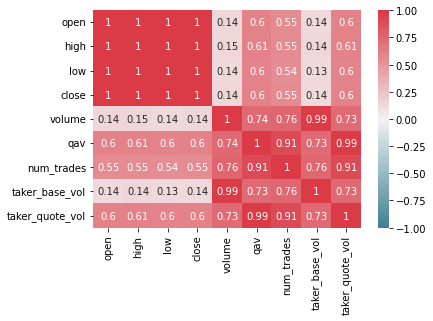

In [ ]:
import seaborn as sns
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True,vmax=1, vmin=-1, cmap =sns.diverging_palette(220, 10, as_cmap=True),center=0 )
plt.show()

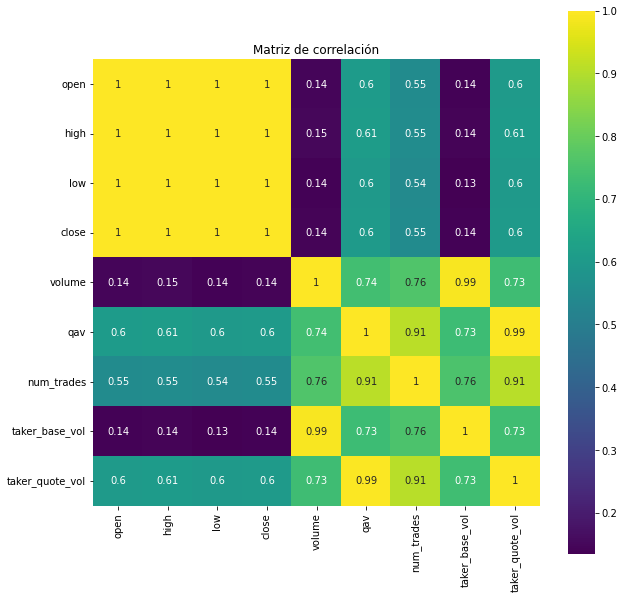

In [ ]:
%matplotlib inline
# Correlatioin matrix matplolib
correlation = df_comp.corr()
plt.figure (figsize=(10,10))
ax= sns.heatmap(correlation, vmax=1, square= True, annot= True, cmap='viridis')
plt.title("Matriz de correlación")
plt.show()

## Dividir los datos en conjunto de Entrenamiento y Prueba
El modelo VAR se ajustará al conjunto de entrenamiento X_train y luego se utilizará el modelo para pronosticar 72 observaciones. Estos pronósticos se compararán con los datos reales del conjunto de prueba.

Creación de los Datasets de Test y Train

In [ ]:

X_train, X_test = df_comp[0:-n_obs], df_comp[-n_obs:]
print(X_train.shape, X_test.shape)


(43321, 9) (72, 9)


In [ ]:
#train test todos los datos
df_train, df_test = df_comp[0:-n_obs], df_comp[-n_obs:]
#train test una variable
df1 = df_comp.drop(['open', 'high','low', 'volume', 'qav','num_trades', 'taker_base_vol','taker_quote_vol'], axis=1)
df1_train, df1_test = df1[0:-n_obs], df1[-n_obs:]
#train tests con retrasos
df_comp_train, df_comp_test =df_comp[0:-n_obs], df_comp[-n_obs:]

# Prueba de estacionariedad
Necesitamos que los datos sean estacionarios para poder usar el modelo VAR. Vamos a averiguarlo haciendo un Test de Dickey-Fuller aumentado, a cada variable univariante que tiene nuestro dataset.

In [ ]:
df_comp.head()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,,
2017-08-18 00:59:59.999,4285.08,4340.62,4228.76,4286.53,82.435474,353504.410409,268.0,70.703594,303212.284309
2017-08-18 01:59:59.999,4269.36,4269.36,4134.61,4243.59,75.684883,318327.529415,243.0,45.573568,192407.488931
2017-08-18 02:59:59.999,4251.95,4298.64,4234.00,4267.59,54.071337,230478.628087,219.0,46.316836,197398.076557
2017-08-18 03:59:59.999,4244.77,4308.70,4234.00,4292.39,64.001349,273495.006480,306.0,52.061572,222560.204200
2017-08-18 04:59:59.999,4292.39,4292.39,4234.43,4287.92,50.797515,216512.633035,267.0,45.826187,195365.989365


In [ ]:
import statsmodels.tsa.stattools as sts

#### Test de Dickey-Fuller

In [ ]:
def augmented_dickey_fuller_statistics(time_series):
  result = sts.adfuller(time_series.values)
  print('p-value: %f' % result[1])

print('Test de Dickey-Fuller Aumentado:')
print('Serie de tiempo open')
augmented_dickey_fuller_statistics(X_train['open'])
print('Serie de tiempo high')
augmented_dickey_fuller_statistics(X_train['high'])
print('Serie de tiempo low')
augmented_dickey_fuller_statistics(X_train['low'])
print('Serie de tiempo close')
augmented_dickey_fuller_statistics(X_train['close'])
print('Serie de tiempo volume')
augmented_dickey_fuller_statistics(X_train['volume'])
print('Serie de tiempo qav')
augmented_dickey_fuller_statistics(X_train['qav'])
print('Serie de tiempo num_trades')
augmented_dickey_fuller_statistics(X_train['num_trades'])
print('Serie de tiempo taker_base_vol')
augmented_dickey_fuller_statistics(X_train['taker_base_vol'])
print('Serie de tiempo taker_quote_vol')
augmented_dickey_fuller_statistics(X_train['taker_quote_vol'])

Test de Dickey-Fuller Aumentado:
Serie de tiempo open
p-value: 0.613717
Serie de tiempo high
p-value: 0.621691
Serie de tiempo low
p-value: 0.610499
Serie de tiempo close
p-value: 0.613108
Serie de tiempo volume
p-value: 0.000000
Serie de tiempo qav
p-value: 0.000000
Serie de tiempo num_trades
p-value: 0.000001
Serie de tiempo taker_base_vol
p-value: 0.000000
Serie de tiempo taker_quote_vol
p-value: 0.000000


Algunos de los p-valores son mayores que 0.05, con lo cual no se rechaza la hipótesis nula de que la serie no es estacionaria. Habría que transformar los datos porque no se puede confirmar estacionariedad.

# Transformación de los datos
La aplicación de la primera diferenciación en el conjunto de entrenamiento debería hacer que todas las series 6 sean estacionarias. Sin embargo, este es un proceso iterativo en el que, después de la primera diferenciación, es posible que la serie siga siendo no estacionaria. Tendremos que aplicar una segunda diferencia o transformación logarítmica para estandarizar la serie en tales casos.

In [ ]:
X_train_transformed=X_train.diff().dropna()
X_train_transformed.head()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,,
2017-08-18 01:59:59.999,-15.72,-71.26,-94.15,-42.94,-6.750591,-35176.880994,-25.0,-25.130026,-110804.795377
2017-08-18 02:59:59.999,-17.41,29.28,99.39,24.00,-21.613546,-87848.901328,-24.0,0.743268,4990.587625
2017-08-18 03:59:59.999,-7.18,10.06,0.00,24.80,9.930012,43016.378393,87.0,5.744736,25162.127643
2017-08-18 04:59:59.999,47.62,-16.31,0.43,-4.47,-13.203834,-56982.373445,-39.0,-6.235385,-27194.214834
2017-08-18 05:59:59.999,-4.47,48.23,15.61,25.64,13.371771,59079.415692,100.0,0.062064,1789.281025


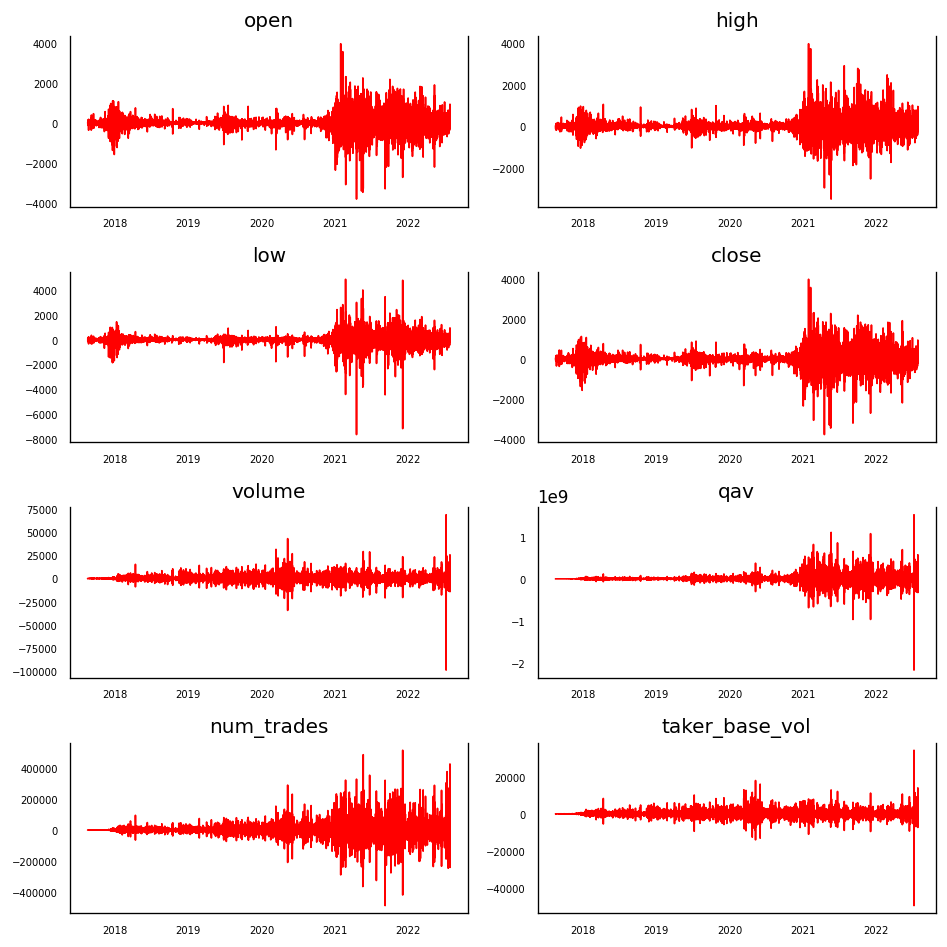

In [ ]:
# Dibujemos los datos transformados
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(8,8)) 
for i, ax in enumerate(axes.flatten()):
  d = X_train_transformed[X_train_transformed.columns[i]]
  ax.plot(d, color='red', linewidth=1)
  ax.set_title(df_comp.columns[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines['top'].set_alpha(0)
  ax.tick_params(labelsize=6)
  plt.tight_layout();

Chequeando si los datos transformados (diferenciados) son estacionarios:

In [ ]:
def augmented_dickey_fuller_statistics(time_series):
  result = sts.adfuller(time_series.values)
  print('p-value: %f' % result[1])

print('Test de Dickey-Fuller Aumentado:')
print('Serie de tiempo open')
augmented_dickey_fuller_statistics(X_train_transformed['open'])
print('Serie de tiempo high')
augmented_dickey_fuller_statistics(X_train_transformed['high'])
print('Serie de tiempo low')
augmented_dickey_fuller_statistics(X_train_transformed['low'])
print('Serie de tiempo close')
augmented_dickey_fuller_statistics(X_train_transformed['close'])
print('Serie de tiempo volume')
augmented_dickey_fuller_statistics(X_train_transformed['volume'])
print('Serie de tiempo qav')
augmented_dickey_fuller_statistics(X_train_transformed['qav'])
print('Serie de tiempo num_trades')
augmented_dickey_fuller_statistics(X_train_transformed['num_trades'])
print('Serie de tiempo taker_base_vol')
augmented_dickey_fuller_statistics(X_train_transformed['taker_base_vol'])
print('Serie de tiempo taker_quote_vol')
augmented_dickey_fuller_statistics(X_train_transformed['taker_quote_vol'])

Test de Dickey-Fuller Aumentado:
Serie de tiempo open
p-value: 0.000000
Serie de tiempo high
p-value: 0.000000
Serie de tiempo low
p-value: 0.000000
Serie de tiempo close
p-value: 0.000000
Serie de tiempo volume
p-value: 0.000000
Serie de tiempo qav
p-value: 0.000000
Serie de tiempo num_trades
p-value: 0.000000
Serie de tiempo taker_base_vol
p-value: 0.000000
Serie de tiempo taker_quote_vol
p-value: 0.000000


Todos los p-valores son < 0.05 por lo tanto se podría concluir que con un solo orden de diferenciación se obtienen series estacionarias.

# Modelo VAR
VAR requiere la estacionariedad de la serie, lo que significa que la media de la serie no cambia con el tiempo (podemos verlo en el gráfico dibujado junto a la Prueba de Dickey-Fuller aumentada).

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
model = VAR(X_train_transformed)

## Seleccionando el orden del modelo

Seleccionamos el modelo de manera manual revisando los diferentes resultados

In [ ]:
modelsel=model.select_order(35)
modelsel.summary()

,AIC,BIC,FPE,HQIC
0,148.4,148.4,2.771e+64,148.4
1,140.9,140.9,1.552e+61,140.9
2,140.3,140.3,8.277e+60,140.3
3,139.9,140.0,6.005e+60,140.0
4,139.8,139.8,5.019e+60,139.8
5,139.6,139.7,4.334e+60,139.6
6,139.5,139.6,3.893e+60,139.5
7,139.4,139.5,3.553e+60,139.5
8,139.4,139.5,3.307e+60,139.4
9,139.3,139.4,3.095e+60,139.3


Seleccionamos el modelo que tiene el mayor AIC

In [ ]:
res = model.fit(maxlags=25, ic='aic')
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 13, Sep, 2022
Time:                     21:34:24
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    139.310
Nobs:                     43295.0    HQIC:                   139.031
Log likelihood:      -3.55774e+06    FPE:                2.11046e+60
AIC:                      138.902    Det(Omega_mle):     2.01385e+60
--------------------------------------------------------------------
Results for equation open
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.000557         0.041620            0.013           0.989
L1.open                    -0.429507         0.004829          -88.945           0.000
L1.high                    -0.000003 

# Causalidad de Granger

Si el p-valor < 0.05 Rechazo la hipótesis nula H0 y mantengo la variable dentro del modelo.

# Matriz de causalidad de Granger

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=15
test = 'ssr_chi2test'
def grangers_causality_matrix(X_train_transformed, variables, test = 'ssr_chi2test', verbose=False):
  dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
  for c in dataset.columns:
    for r in dataset.index:
      test_result = grangercausalitytests(X_train_transformed[[r,c]], maxlag=maxlag, verbose=False)
      p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
      if verbose: 
        print(f'Y = {r}, X = {c}, P Values = {p_values}')
      min_p_value = np.min(p_values)
      dataset.loc[r,c] = min_p_value
  dataset.columns = [var + '_x' for var in variables]
  dataset.index = [var + '_y' for var in variables]
  return dataset
grangers_causality_matrix(X_train_transformed, variables = X_train_transformed.columns)

,open_x,high_x,low_x,close_x,volume_x,qav_x,num_trades_x,taker_base_vol_x,taker_quote_vol_x
open_y,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0054,0.0000
high_y,0.0000,1.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000
low_y,0.0000,0.0,1.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000
close_y,0.0000,0.0,0.0,1.0,0.0439,0.0002,0.0,0.0318,0.0000
volume_y,0.0001,0.0,0.0,0.0,1.0000,0.0000,0.0,0.0015,0.0000
qav_y,0.0000,0.0,0.0,0.0,0.0500,1.0000,0.0,0.0219,0.0000
num_trades_y,0.0000,0.0,0.0,0.0,0.0000,0.0000,1.0,0.0000,0.0000
taker_base_vol_y,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,1.0000,0.0001
taker_quote_vol_y,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0098,1.0000


# Diagnosis del modelo

## Residuos

In [ ]:
residuals=res.resid

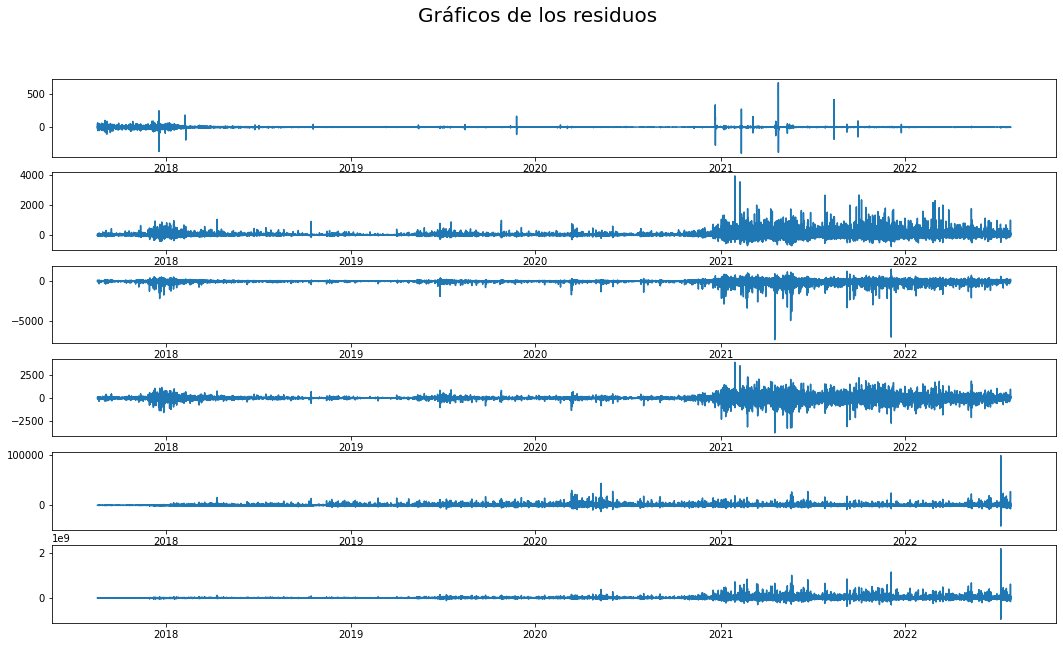

In [ ]:
fig, axs = plt.subplots(6)
fig.suptitle('Gráficos de los residuos',fontsize=20)
fig.set_size_inches(18, 10)
[axs[i].plot(residuals.iloc[:,i]) for i in range(6)]
plt.show()

## Dickey - Fuller a los residuos

In [ ]:
print('Open high low close volume qav num_trades taker_base_vol taker_quote_vol')
[sts.adfuller(residuals.iloc[:,i])[1] for i in range(8)]


Open high low close volume qav num_trades taker_base_vol taker_quote_vol


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Todos los p-valores son < 0.05 por tanto se rechaza la hipótesis nula de que las 6 series de residuos no son estacionarias, por lo cual con un 95% de confianza se cree que son estacionarias. 

## ACF de los Residuos

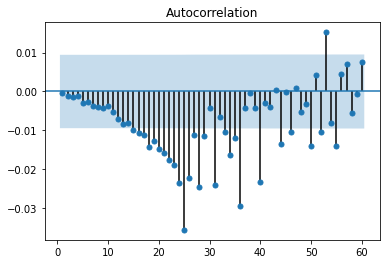

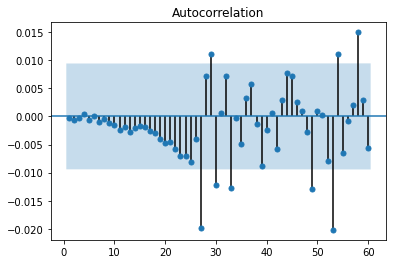

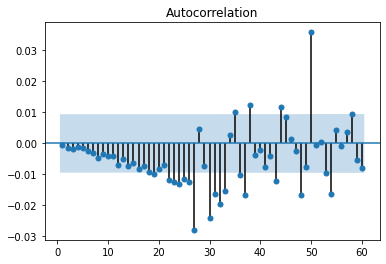

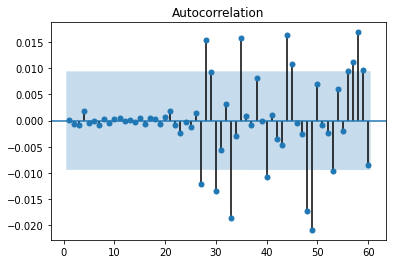

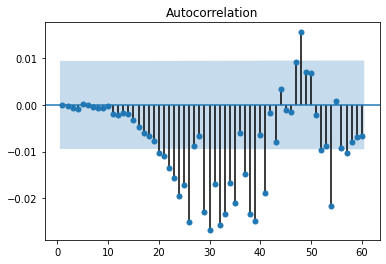

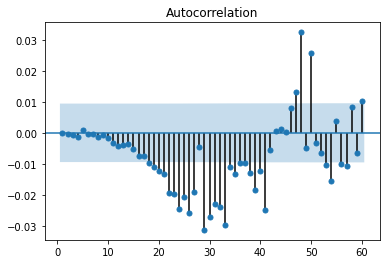

In [ ]:
import statsmodels.graphics.tsaplots as sgt
[sgt.plot_acf(residuals.iloc[:,i], zero = False, lags = 60) for i in range(6)]
plt.show()


Conclusión: Los residuos del modelo no presentan estructura de autocorrelación, son estacionarios según los resultados de la prueba de Dickey - Fuller aumentada y en los gráficos se puede comprobar esto visualmente, entonces puede concluirse que son ruido blanco como es deseable.

## Valores predichos

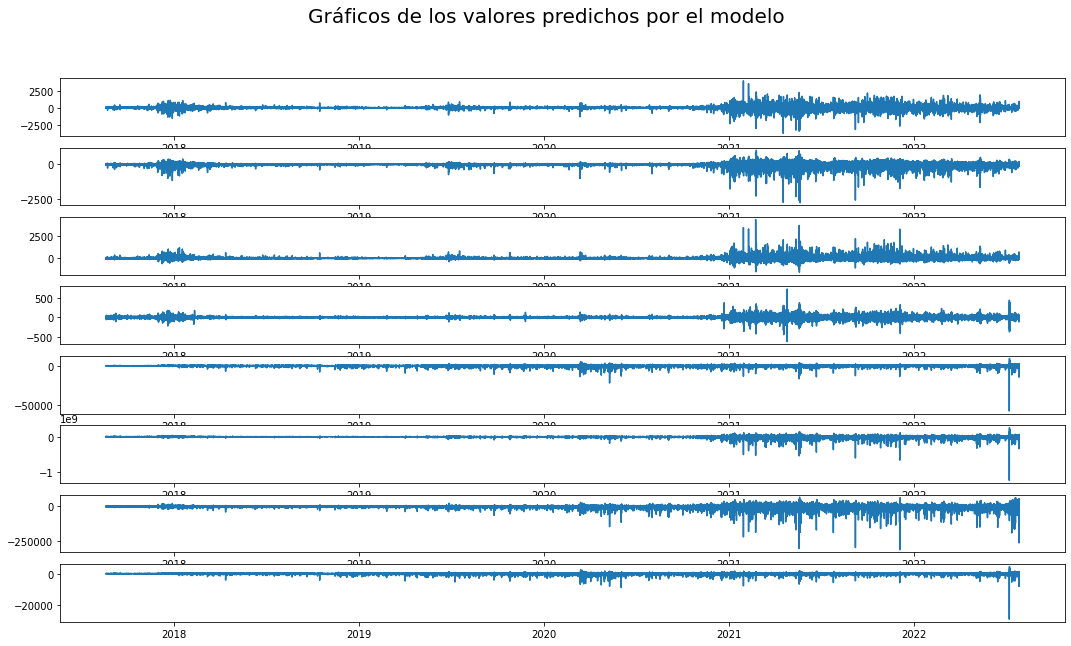

In [ ]:
y_fitted = res.fittedvalues
fig, axs = plt.subplots(8)
fig.suptitle('Gráficos de los valores predichos por el modelo',fontsize=20)
fig.set_size_inches(18, 10)
[axs[i].plot(y_fitted.iloc[:,i]) for i in range(8)]
plt.show()

# Pronósticos a futuro

## Hallando los pronósticos

Para pronosticar, al modelo VAR le podemos pasar hasta el número de orden de retraso de observaciones de los datos pasados. Esto se debe a que los términos en el modelo VAR son esencialmente los retrasos de las diversas series de tiempo en el conjunto de datos, por lo que debemos proporcionar tantos valores anteriores como lo indique el orden de retraso utilizado por el modelo. De lo contrario estaríamos introduciendo poca fiabilidad.


In [ ]:
# Obtener el orden del modelo
lag_order = res.k_ar
print('Orden del modelo:', lag_order)
# Input data para hacer forecasting (pronósticos a futuro)
input_data = X_train_transformed.values[-lag_order:]
# Forecasting
pred = res.forecast(y=input_data, steps=n_obs)
pred = (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred'))
print('Predicciones:')
pred

Orden del modelo: 25
Predicciones:


,open_pred,high_pred,low_pred,close_pred,volume_pred,qav_pred,num_trades_pred,taker_base_vol_pred,taker_quote_vol_pred
Date,,,,,,,,,
2022-07-28 01:59:59.999,-169.533582,-124.999890,-195.164295,-21.421171,-752.933286,-1.867804e+07,-29416.445940,-358.927234,-9.370138e+06
2022-07-28 02:59:59.999,-21.018914,-21.919132,47.888469,-11.436571,-482.815820,-1.551310e+07,-8902.367888,-268.561131,-8.026658e+06
2022-07-28 03:59:59.999,-11.428523,-50.225182,-23.379285,-0.532789,-434.706787,-8.730693e+06,-14981.459281,-177.432647,-4.466717e+06
2022-07-28 04:59:59.999,0.702008,44.672488,19.158169,6.587809,962.384038,2.612165e+07,12626.694402,464.182318,1.373149e+07
2022-07-28 05:59:59.999,6.225476,-36.103380,17.140517,-53.980007,-504.436104,-1.595559e+07,-4995.026216,-213.967413,-8.139935e+06
...,...,...,...,...,...,...,...,...,...
2022-07-30 20:59:59.999,-0.127321,0.005302,0.304971,0.439876,-31.635131,-8.556466e+05,-375.578620,-16.233447,-4.434335e+05
2022-07-30 21:59:59.999,0.401570,0.163101,0.703424,0.201803,-33.629773,-9.379031e+05,-433.607802,-16.926829,-4.767448e+05
2022-07-30 22:59:59.999,0.194915,-0.186022,0.559870,0.466210,-32.044497,-9.684518e+05,-427.175974,-16.254716,-4.925104e+05


<Figure size 864x720 with 0 Axes>

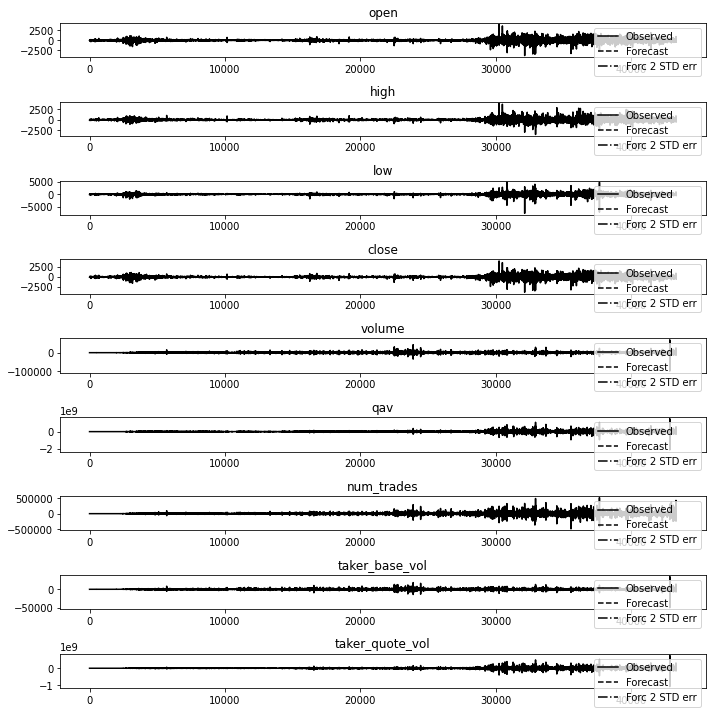

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 10))
res.plot_forecast(15)
plt.tight_layout(h_pad = 1.15)
plt.show()

## Invirtiendo la transformación de los pronósticos a la escala original

Los pronósticos se generan en la escala de los datos de entrenamiento utilizados por el modelo, es decir, son datos transformados. Entonces, para volver a ponerlos en su escala original, necesitamos des-diferenciarlos.
La forma de invertir la diferenciación es sumar estas diferencias consecutivamente al número base. Una forma sencilla de hacerlo es determinar primero la suma acumulada y luego sumarla al número base.
Este proceso se puede revertir agregando la observación en el paso de tiempo anterior al difference value. inverted(ts) = differenced(ts) + observation(ts-1)

In [ ]:
# Invirtiendo la transformación
def invert_transformation(X_train, pred):
  forecast = pred.copy()
  columns = X_train.columns
  for col in columns:
    forecast[str(col)+'_pred'] = X_train[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
  return forecast

output = invert_transformation(X_train, pred)
output


,open_pred,high_pred,low_pred,close_pred,volume_pred,qav_pred,num_trades_pred,taker_base_vol_pred,taker_quote_vol_pred
Date,,,,,,,,,
2022-07-28 01:59:59.999,22784.776418,22937.900110,22556.785705,22763.898829,7927.435354,1.799025e+08,234542.554060,3965.876396,8.958935e+07
2022-07-28 02:59:59.999,22763.757505,22915.980979,22604.674175,22752.462258,7444.619534,1.643894e+08,225640.186172,3697.315265,8.156269e+07
2022-07-28 03:59:59.999,22752.328982,22865.755797,22581.294890,22751.929469,7009.912747,1.556587e+08,210658.726891,3519.882618,7.709597e+07
2022-07-28 04:59:59.999,22753.030990,22910.428285,22600.453059,22758.517278,7972.296785,1.817804e+08,223285.421293,3984.064936,9.082747e+07
2022-07-28 05:59:59.999,22759.256466,22874.324906,22617.593576,22704.537271,7467.860681,1.658248e+08,218290.395077,3770.097523,8.268753e+07
...,...,...,...,...,...,...,...,...,...
2022-07-30 20:59:59.999,22767.646990,22923.979859,22610.382965,22768.094752,9888.089020,2.236612e+08,258744.258483,4955.855277,1.116234e+08
2022-07-30 21:59:59.999,22768.048560,22924.142959,22611.086389,22768.296555,9854.459247,2.227233e+08,258310.650681,4938.928448,1.111466e+08
2022-07-30 22:59:59.999,22768.243475,22923.956938,22611.646258,22768.762766,9822.414750,2.217549e+08,257883.474707,4922.673732,1.106541e+08


## Pronósticos del Open

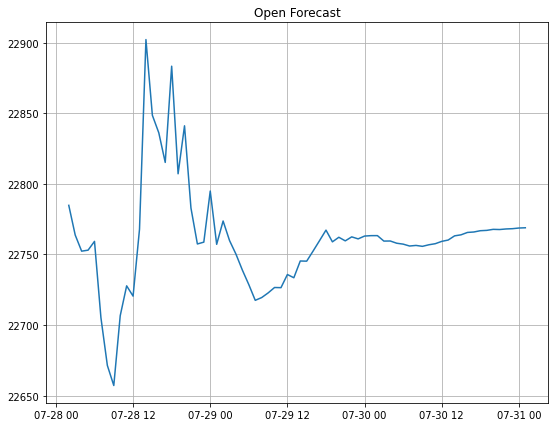

In [ ]:
plt.figure(figsize = (9,7))
plt.plot(output.iloc[:,0])
plt.title('Open Forecast')
plt.grid()
plt.show()

## Comparando los datos pronosticados con el dataset de prueba

In [ ]:
combine = pd.concat([output['close_pred'], X_test['close']], axis=1)
combine = combine.round(decimals=2)
combine = combine.sort_values(by='Date', ascending=False)

In [ ]:
combine

,close_pred,close
Date,,
2022-07-31 00:59:59.999,22769.29,23747.03
2022-07-30 23:59:59.999,22768.94,23643.51
2022-07-30 22:59:59.999,22768.76,23700.98
2022-07-30 21:59:59.999,22768.30,23860.51
2022-07-30 20:59:59.999,22768.09,23963.03
...,...,...
2022-07-28 05:59:59.999,22704.54,23242.79
2022-07-28 04:59:59.999,22758.52,23066.63
2022-07-28 03:59:59.999,22751.93,23133.45


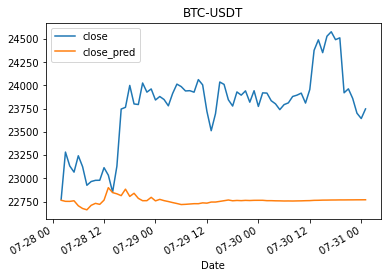

In [ ]:
combine["close"].plot(title = 'BTC-USDT', legend = 'close')
combine["close_pred"].plot(title = 'BTC-USDT', legend = 'close_pred')

# Evaluación del modelo

Para evaluar los pronósticos, se puede calcular un conjunto completo de métricas, como MAE y RMSE. 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean absolute error:', mean_absolute_error(combine['close'].values, combine['close_pred'].values))
print('Root mean squared error:', np.sqrt(mean_squared_error(combine['close'].values, combine['close_pred'].values)))

Mean absolute error: 1004.7129166666663
Root mean squared error: 1086.4220666845672


## Definción de la función para presentar datos

In [ ]:
import warnings
warnings.simplefilter('ignore')

def show_graph(df1,df2,title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    #data=data.iloc[43200:]

    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)

    plt.rcParams["figure.figsize"] = (10, 5)
    plt.title(title)
    plt.legend()
    plt.show()
    print ()
    print('Evaluated model:', title)
    print('Mean absolute error:', mean_absolute_error(df2['close'].values,df2['Pred'].values))
    print('Root mean squared error:', np.sqrt(mean_squared_error(df2['close'].values,df2['Pred'].values)))

In [ ]:
df_ret= pd.DataFrame(output['close_pred']) 
df_ret = df_ret.rename(columns={'close_pred':'Pred'})
df_train=pd.DataFrame(X_test['close'])

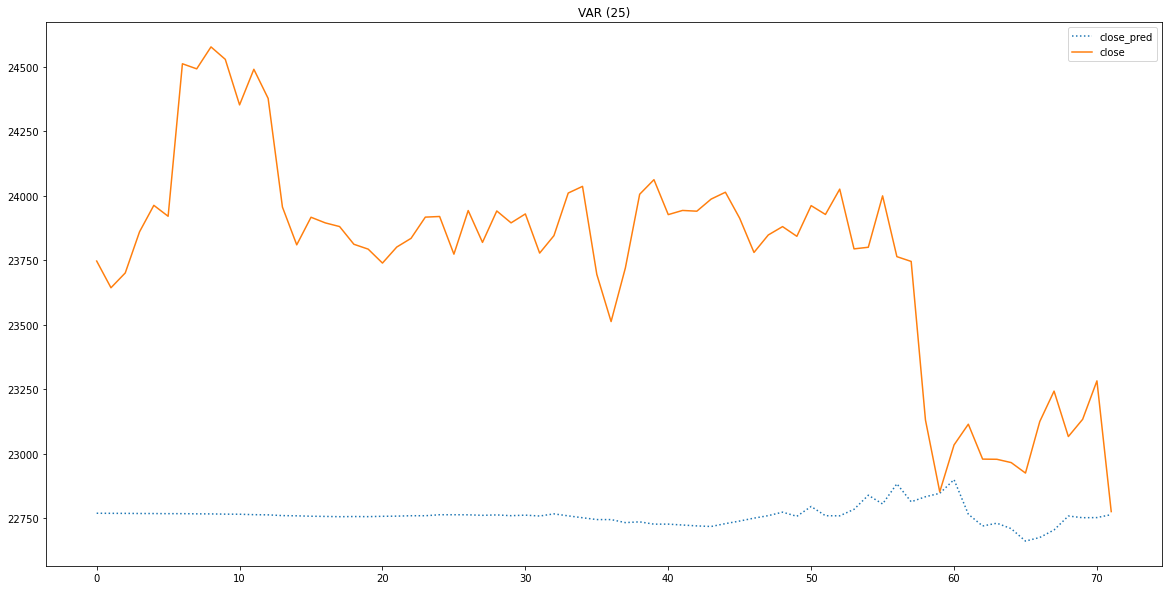


Evaluated model: VAR (25)
Mean absolute error: 1004.7129166666663
Root mean squared error: 1086.4220666845672


In [ ]:
show_graphp1(combine, 'VAR (25)')


In [ ]:
#show_graphp1(combine, 'VAR (25)')


# metric_df= pd.concat([combine, df1.reindex(df1.index)], axis=1)
# show_graphp2(metric_df, 'AR (1)')
# metric_df

df1

,close
Date,
2017-08-18 00:59:59.999,4286.53
2017-08-18 01:59:59.999,4243.59
2017-08-18 02:59:59.999,4267.59
2017-08-18 03:59:59.999,4292.39
2017-08-18 04:59:59.999,4287.92
...,...
2022-07-30 20:59:59.999,23963.03
2022-07-30 21:59:59.999,23860.51
2022-07-30 22:59:59.999,23700.98


## Función para representar los resultados

In [ ]:
warnings.simplefilter('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error

def show_graphp1(data,title):
    data.reset_index(inplace=True, drop=True)

    for col in data.columns:
        if col.lower().startswith('close_pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)

    plt.rcParams["figure.figsize"] = (20, 10)
    plt.title(title)
    plt.legend()
    plt.show()
    print ()
    print('Evaluated model:', title)
    print('Mean absolute error:', mean_absolute_error(data['close'].values,data['close_pred'].values))
    print('Root mean squared error:', np.sqrt(mean_squared_error(data['close'].values,data['close_pred'].values)))

In [ ]:
warnings.simplefilter('ignore')

def show_graphp2(data,title):
    data.reset_index(inplace=True, drop=True)
    data=data.iloc[43200:]

    for col in data.columns:
        if col.lower().startswith('close_pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)

    plt.rcParams["figure.figsize"] = (20, 10)
    plt.title(title)
    plt.legend()
    plt.show()
   